**The story of the Diabetic Patient Dataset for a Non-Technical Audience:**

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df1 = pd.read_csv('clean_data2.csv')
df1.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,Other
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,missing,...,No,Up,No,No,No,No,No,Ch,Yes,Other
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,missing,...,No,Up,No,No,No,No,No,Ch,Yes,Other
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,missing,...,No,Steady,No,No,No,No,No,Ch,Yes,Other
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,missing,...,No,Steady,No,No,No,No,No,No,Yes,Other


In [3]:
df1.keys()

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
df1.readmitted.value_counts()

Other    59326
<30       5455
Name: readmitted, dtype: int64

In [5]:
readmissions_df = df1[df1.readmitted == '<30']
readmissions_df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
10,36900,77391171,AfricanAmerican,Male,[60-70),2,1,4,7,missing,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
11,40926,85504905,Caucasian,Female,[40-50),1,3,7,7,Family/GeneralPractice,...,No,Down,No,No,No,No,No,Ch,Yes,<30
15,77076,92519352,AfricanAmerican,Male,[50-60),1,1,7,4,missing,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
46,550098,21820806,AfricanAmerican,Male,[50-60),2,1,2,4,missing,...,No,No,No,No,No,No,No,No,No,<30
61,796152,23043240,Caucasian,Female,[50-60),2,1,4,2,missing,...,No,Steady,No,No,No,No,No,No,Yes,<30


In [6]:
others_df = df1[df1.readmitted == 'Other']
others_df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,Other
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,missing,...,No,Up,No,No,No,No,No,Ch,Yes,Other
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,missing,...,No,Up,No,No,No,No,No,Ch,Yes,Other
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,missing,...,No,Steady,No,No,No,No,No,Ch,Yes,Other
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,missing,...,No,Steady,No,No,No,No,No,No,Yes,Other


In [22]:
def column_compare(df1, df2, column):
    # make sure to list readmitted_df first
    makeup1 = df1[column].value_counts(normalize=True)
    makeup2 = df2[column].value_counts(normalize=True)
    data={'Readmitted':makeup1,
         'Other':makeup2}
    comparison_df = pd.concat(data, axis=1)
    return comparison_df

cols = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
        'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
        'number_emergency', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change']

In [24]:
for col in cols:
    comparison_df = column_compare(readmissions_df, others_df, col)
    print('Comparison column:',col.upper())
    print(comparison_df)

Comparison column: RACE
                 Readmitted     Other
Caucasian          0.765720  0.744581
AfricanAmerican    0.173969  0.182787
?                  0.022731  0.028234
Hispanic           0.016132  0.020531
Other              0.015582  0.016620
Asian              0.005866  0.007248
Comparison column: GENDER
                 Readmitted     Other
Female             0.540788  0.532347
Male               0.459212  0.467603
Unknown/Invalid         NaN  0.000051
Comparison column: AGE
          Readmitted     Other
[70-80)     0.283593  0.247278
[60-70)     0.222181  0.222550
[80-90)     0.198167  0.159812
[50-60)     0.142071  0.178168
[40-50)     0.079010  0.098574
[90-100)    0.031714  0.027239
[30-40)     0.028964  0.039106
[20-30)     0.010449  0.016536
[10-20)     0.003483  0.008259
[0-10)      0.000367  0.002478
Comparison column: ADMISSION_TYPE_ID
   Readmitted     Other
1    0.535839  0.513906
3    0.180018  0.193372
2    0.179285  0.182770
6    0.051146  0.055237
5    0.0507

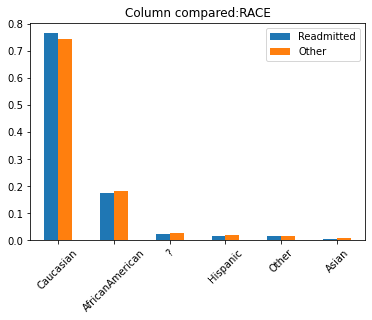

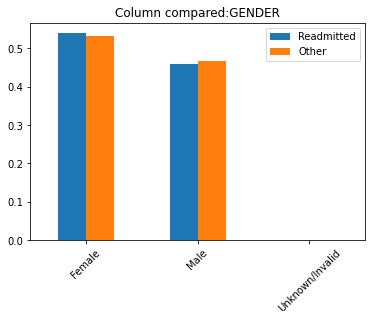

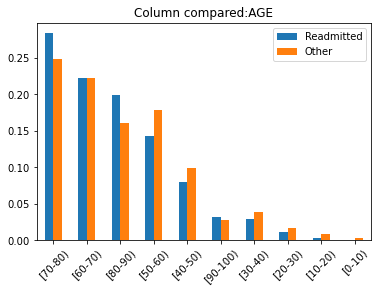

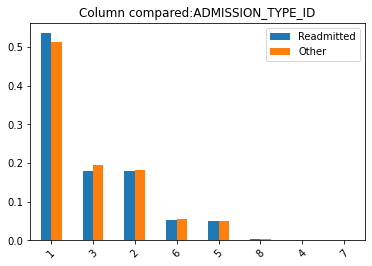

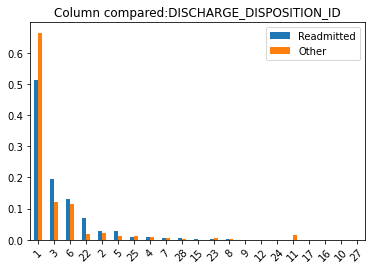

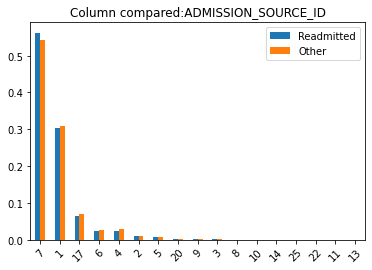

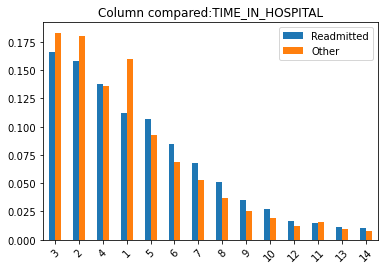

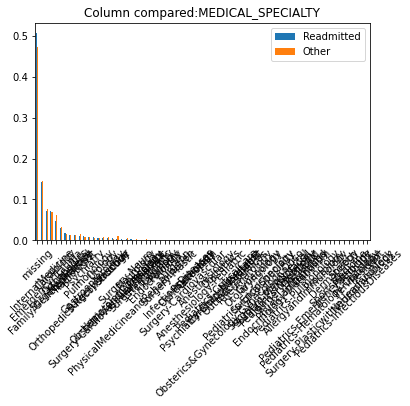

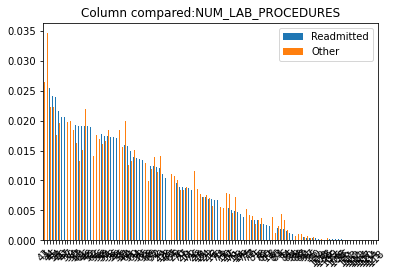

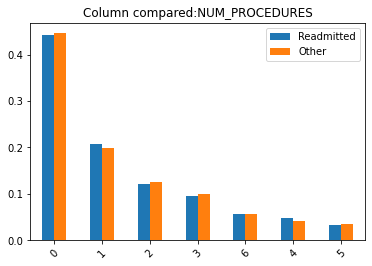

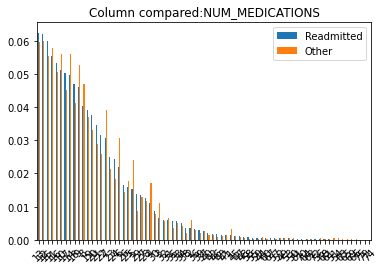

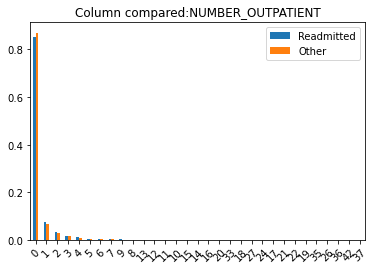

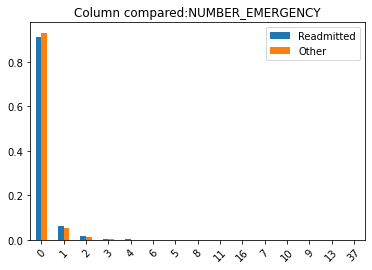

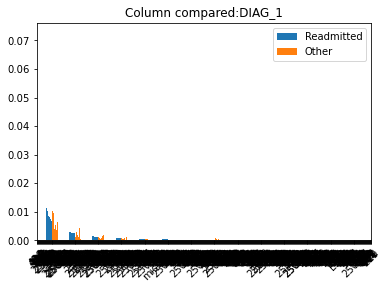

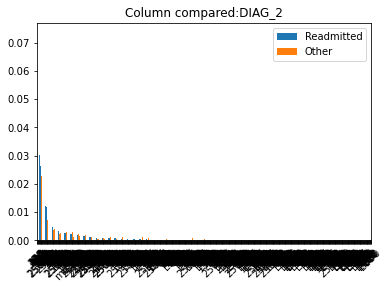

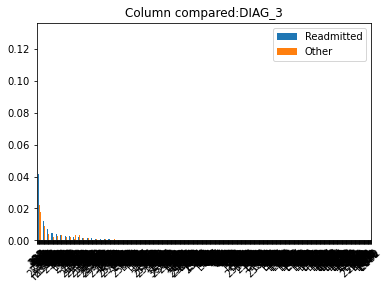

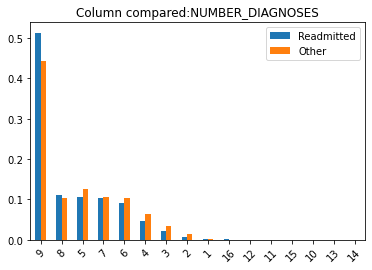

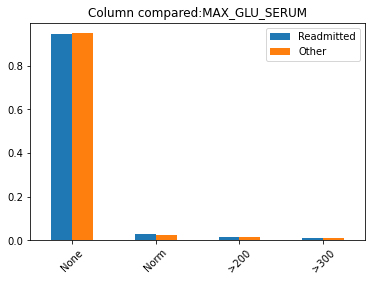

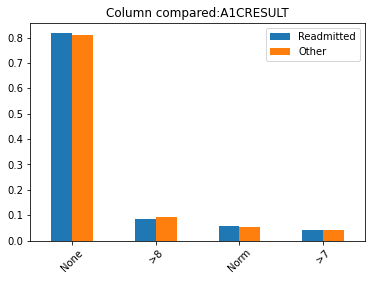

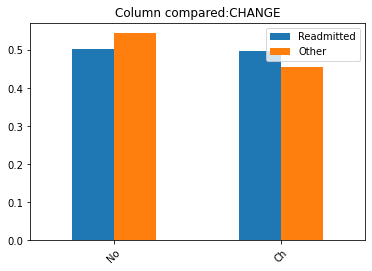

In [37]:
for col in cols:
    df = column_compare(readmissions_df, others_df, col)
    ax = df.plot.bar(rot=45)
    ax.set_title('Column compared:{}'.format(col.upper()));